In [46]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

channels = [
  {'name':"alpha", 'columns':slice(16, 25, 1)},
  {'name':"beta", 'columns':slice(17, 26, 1)},
]
buffer = np.zeros((4, len(channels) + 1),)
i = 0
def mean(row):
  return row.mean(axis=0)
func = mean

In [49]:
row1 = np.array([
  15.093,16.585,17.877,18.292,18.667,15.536,17.226,15.359,13.659,10.647,11.716,12.832,10.273,10.187,12.236,12.543,9.692,6.498,8.167,7.983,7.934,8.196,8.496,6.969,9.109,7.928,9.288,8.964,10.002,10.749,10.301,8.172,6.281,5.929,5.055,7.771,5.108,6.570,5.933,6.486,7.116,6.691,6.377,8.424,5.625,7.402,7.411,7.200,5.898,7.038,7.856,7.273,9.968,10.594,10.013,7.855,16.829,11.762,7.992,9.314,6.142,7.031,8.312,16.858,13.732,9.046,7.277,7.261,8.219,6.863,0
])
# row1 = np.ones(71,)

data = [ func(row1[ch['columns']]) for ch in channels ] + [row1[-1]]
aggregated_row = np.array(data)
aggregated_row.shape

buffer[i] = aggregated_row
i = (i+1) % 4

In [50]:
buffer, i

(array([[8.116, 7.92 , 0.   ],
        [8.116, 7.92 , 1.   ],
        [0.   , 0.   , 0.   ],
        [0.   , 0.   , 0.   ]]),
 2)

In [51]:
buffer_get = np.vstack((buffer[i:], buffer[:i]))
buffer_get[:, 0] = buffer_get[:, 0] + 1
buffer_get

array([[1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [9.116, 7.92 , 0.   ],
       [9.116, 7.92 , 1.   ]])

[]

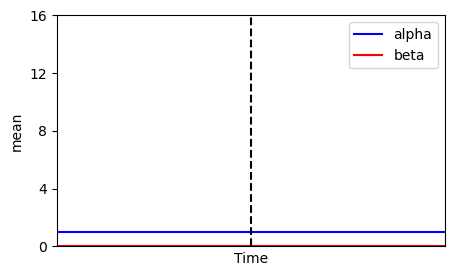

In [41]:
figure = plt.figure(figsize=(5, 3))
ax = figure.add_subplot(111)
# plot = ax.plot(buffer_get, label=[ch['name'] for ch in channels])

# ax.legend([ch['name'] for ch in channels])
X_LABELS = ["t-3", "t-2", "t-1", "t"]
ax.set_xticks(range(4))
ax.set_xticklabels(X_LABELS)
ax.set_xlabel("Time")
ax.set_ylabel(func.__name__)
Y_LABELS = range(0, 20, 4)  
ax.set_yticks(Y_LABELS)
ax.set_yticklabels(Y_LABELS)


plota = Line2D([], [])
plota.set_label("alpha")
plota.set_color('blue')

plotb = Line2D([], [])
plotb.set_label("beta")
plotb.set_color('red')
ax.add_line(plota)
ax.add_line(plotb)



plota.set_data(range(len(buffer_get)), buffer_get[:, 0])


plotb.set_data(range(len(buffer_get)), buffer_get[:, 1])
ax.axvline(x=1.5, color='black', linestyle='--') 

ax.legend()
# set different colors to the lines
ax.plot()

In [37]:
plota.set_data(range(len(buffer_get)), buffer_get[:, 0])
ax.add_line(plota)


plotb.set_data(range(len(buffer_get)), buffer_get[:, 1])
ax.add_line(plotb)

ax.legend()
# set different colors to the lines
ax.plot()

[]